# Total field anomaly - Solid sphere

**This notebook exemplifies how to calculate magnetic anomaly due to a solid sphere with its center located undersurface and describe as $x_e$, $y_e$, $z_e$. This implementation is based on Blakely (1996).**

**The total field anomaly is calculated by two differents formulations:**
* 1 - Usual total field anomaly:
## $$ \Delta T = |\,\mathbf{F} + \mathbf{B}\,| - 
|\,\mathbf{F}\,|$$
where $|\,\mathbf{F}\,|$ is the magnetic intensity and $|\,\mathbf{B}\,|$ is the magnetic induction produced on the observation points $(x_i, y_i, z_i)$.


* 2 - Approximated total field anomaly:
## $$ \Delta T_i = \mathbf{\hat{F^t}}\,\mathbf{B_i}$$
where $\mathbf{\hat{F^t}}$ is the unitary vector with same direction on the geomagnetic field $\mathbf{F}$.

**The second implementation is used on Fatiando a Terra.**

In [1]:
# Copying all usefull libraries
import numpy as np
from matplotlib import pyplot as plt
import sys

In [2]:
sys.path.append('codes/') 

In [9]:
from codes import sphere, statistical, auxiliars, grids

In [10]:
# Definition for number of points and grid creation
shape = (100, 100)
x, y, z = grids.regular_grid((-2000., 2000., -2000., 2000.), shape, -50.)

In [14]:
# Setting the parameters for a sphere
model = [0., 0., 500., 500.] # meters + A/m2

# Writing inclination, declination, azimuth 
incf, decf = 65., 35. # regional field
incs, decs = 28., -22. # source

In [15]:
# Calculating the B components
bx = sphere.sphere_bx(x, y, z, model, 1., incs, decs)
by = sphere.sphere_by(x, y, z, model, 1., incs, decs)
bz = sphere.sphere_bz(x, y, z, model, 1., incs, decs)

In [16]:
# Analyzing the data
_ = statistical.analysis(bx, 'nT')
print
_ = statistical.analysis(by, 'nT')
print
_ = statistical.analysis(bz, 'nT')

Minimum:    -297.3504 nT
Maximum:    130.5931 nT
Mean value: -3.3607 nT
Variation:  427.9435 nT

Minimum:    -147.0908 nT
Maximum:    200.7349 nT
Mean value: 1.3578 nT
Variation:  347.8256 nT

Minimum:    -135.1871 nT
Maximum:    428.3044 nT
Mean value: 3.8545 nT
Variation:  563.4915 nT


In [18]:
# Adding noise
# 1) Profiles
bxnoise = auxiliars.noise_normal_dist(bx, 1., 0.1)
bynoise = auxiliars.noise_normal_dist(by, 1., 0.1)
bznoise = auxiliars.noise_normal_dist(bz, 1., 0.1)

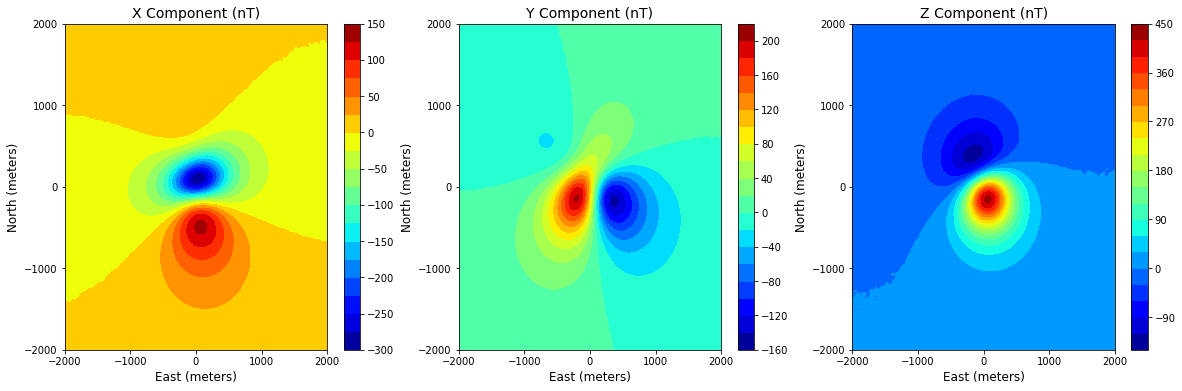

In [31]:
# Ploting all results 
pyplot.close('all')
pyplot.figure(figsize=(20,6))

pyplot.subplot(1, 3, 1)
pyplot.contourf(y.reshape(shape), x.reshape(shape), bxnoise.reshape(shape), 20, cmap = pyplot.cm.jet)
pyplot.title('X Component (nT)', fontsize = 14)
pyplot.xlabel('East (meters)', fontsize = 12)
pyplot.ylabel('North (meters)', fontsize = 12)
pyplot.xticks(numpy.linspace(x.min(), x.max(), 5))
pyplot.yticks(numpy.linspace(y.min(), y.max(), 5))
pyplot.colorbar()

pyplot.subplot(1, 3, 2)
pyplot.contourf(y.reshape(shape), x.reshape(shape), bynoise.reshape(shape), 20, cmap = pyplot.cm.jet)
pyplot.title('Y Component (nT)', fontsize = 14)
pyplot.xlabel('East (meters)', fontsize = 12)
pyplot.ylabel('North (meters)', fontsize = 12)
pyplot.xticks(numpy.linspace(x.min(), x.max(), 5))
pyplot.yticks(numpy.linspace(y.min(), y.max(), 5))
pyplot.colorbar()

pyplot.subplot(1, 3, 3)
pyplot.contourf(y.reshape(shape), x.reshape(shape), bznoise.reshape(shape), 20, cmap = pyplot.cm.jet)
pyplot.title('Z Component (nT)', fontsize = 14)
pyplot.xlabel('East (meters)', fontsize = 12)
pyplot.ylabel('North (meters)', fontsize = 12)
pyplot.xticks(numpy.linspace(x.min(), x.max(), 5))
pyplot.yticks(numpy.linspace(y.min(), y.max(), 5))
pyplot.colorbar()

pyplot.show()

In [33]:
# Calculating total field due to a solid prims - usual calculation
tf = sphere.sphere_tf(x, y, z, model, 1., 23500., incf, decf, incs, decs)

In [34]:
# Calculating total field due to a solid prims - approxiimation
tfa = sphere.sphere_tfa(x, y, z, model, 1., incf, decf, incs, decs)

In [35]:
# Analyzing
_ = statistical.analysis(tf, 'nT')
print
_ = statistical.analysis(tfa, 'nT')

Minimum:    -147.5821 nT
Maximum:    386.5531 nT
Mean value: 2.7203 nT
Variation:  534.1352 nT

Minimum:    -147.8240 nT
Maximum:    386.1301 nT
Mean value: 2.6591 nT
Variation:  533.9541 nT


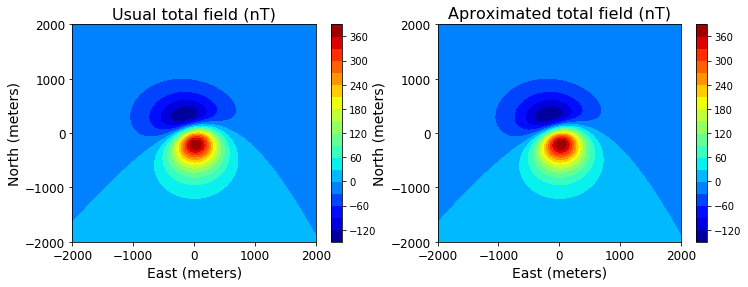

In [41]:
# Plotting the result for usual total field anomaly calculation
pyplot.close('all')
pyplot.figure(figsize=(12,4))

pyplot.subplot(1, 2, 1)
pyplot.contourf(y.reshape(shape), x.reshape(shape), tf.reshape(shape), 20, cmap = pyplot.cm.jet)
pyplot.title('Usual total field (nT)', fontsize = 16)
pyplot.xlabel('East (meters)', fontsize = 14)
pyplot.ylabel('North (meters)', fontsize = 14)
pyplot.xticks(numpy.linspace(x.min(), x.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(y.min(), y.max(), 5), fontsize = 12)
pyplot.colorbar()

pyplot.subplot(1, 2, 2)
pyplot.contourf(y.reshape(shape), x.reshape(shape), tfa.reshape(shape), 20, cmap = pyplot.cm.jet)
pyplot.title('Aproximated total field (nT)', fontsize = 16)
pyplot.xlabel('East (meters)', fontsize = 14)
pyplot.ylabel('North (meters)', fontsize = 14)
pyplot.xticks(numpy.linspace(x.min(), x.max(), 5), fontsize = 12)
pyplot.yticks(numpy.linspace(y.min(), y.max(), 5), fontsize = 12)
pyplot.colorbar()

pyplot.show()